In [1]:
import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from astropy.io import fits
import datetime

In [2]:
# read FITS file containing CLs

In [3]:
hdul = fits.open('Planck_Lensing_CL.fits')
hdul.info()
cl = hdul[0].data

Filename: Planck_Lensing_CL.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (2551,)   float64   


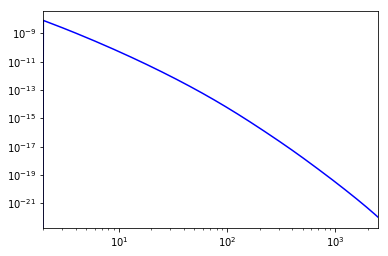

In [4]:
ls = np.arange(cl.shape[0])
plt.loglog(ls,cl, color='b')
plt.xlim([2,2500])
plt.show()

In [5]:
# now create map from CLs
m1 = hp.sphtfunc.synfast(cl, nside = 512)

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/healpy/sphtfunc.py:390: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


monopole: 2.69805e-11  dipole: lon: 122.367, lat: 79.9429, amp: 3.49472e-11


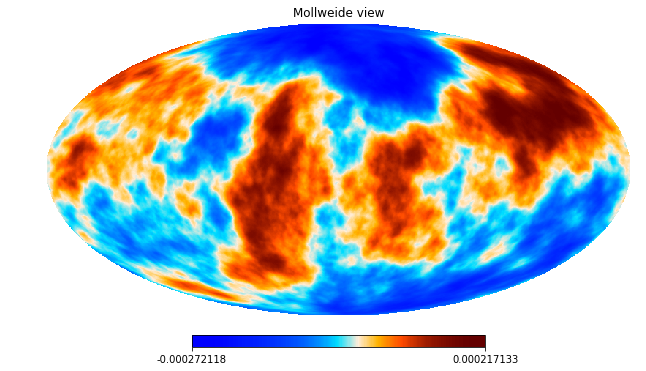

In [7]:
colombi1_cmap = ListedColormap(np.loadtxt("Planck_Parchment_RGB.txt")/255.)
colombi1_cmap.set_bad("gray") # color of missing pixels
colombi1_cmap.set_under("white") # color of background
hp.mollview(m1,remove_dip = True, norm = 'hist', cmap = colombi1_cmap)
plt.show()

In [95]:
## Convert map back to CLs
cl_new = hp.anafast(m1)

In [96]:
ell = np.arange(cl_new.shape[0])

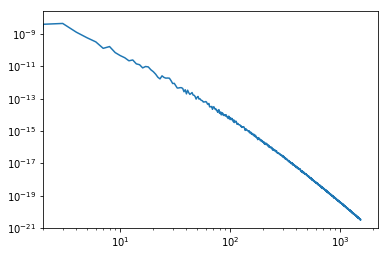

In [97]:
plt.loglog(ell, cl_new )
plt.xlim(xmin=2)
plt.ylim(ymin=1e-21)
plt.show()

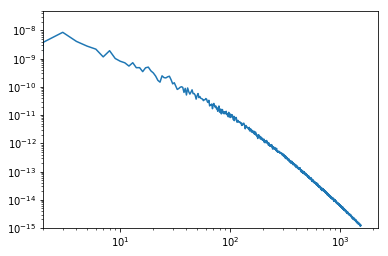

In [99]:
# HEALPIX anafast generates raw CLs, so need to normalise for lensing power spectrum
# https://healpy.readthedocs.io/en/latest/tutorial.html
plt.loglog(ell, cl_new * ell * (1+ell) /(2*np.pi) )
plt.xlim(xmin=2)
plt.ylim(ymin=1e-15)
plt.show()

In [129]:
#m0 = hp.read_map('/mnt/pact/rb460/Jupyter Notebooks/Gravitational Lensing/HFI_SkyMap_353_2048_R2.02_survey-1.fits')

m3 = hp.read_map('/mnt/pact/rb460/Jupyter Notebooks/Gravitational Lensing/LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits')

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


monopole: 8.6493e-05  dipole: lon: 2.21139, lat: 0.404303, amp: 5.43489e-05


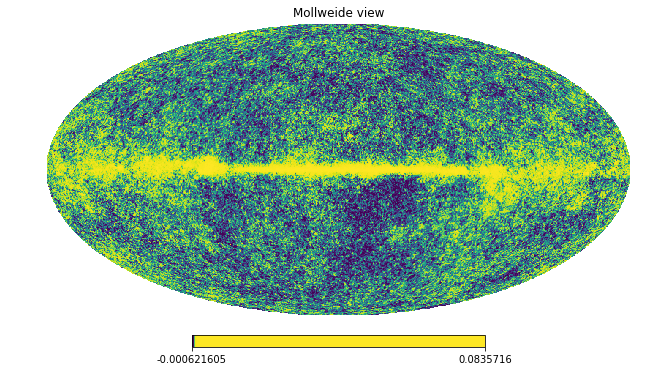

In [138]:
colombi1_cmap = ListedColormap(np.loadtxt("Planck_Parchment_RGB.txt")/255.)
colombi1_cmap.set_bad("gray") # color of missing pixels
colombi1_cmap.set_under("white") # color of background, necessary if you want to use
# this colormap directly with hp.mollview(m, cmap=colombi1_cmap)
hp.mollview(m3,remove_dip = True, norm = 'hist', cmap = colombi1_cmap)

In [141]:
colombi1_cmap

monopole: 0.00406414  dipole: lon: 15.1842, lat: 7.14358, amp: 0.00247651


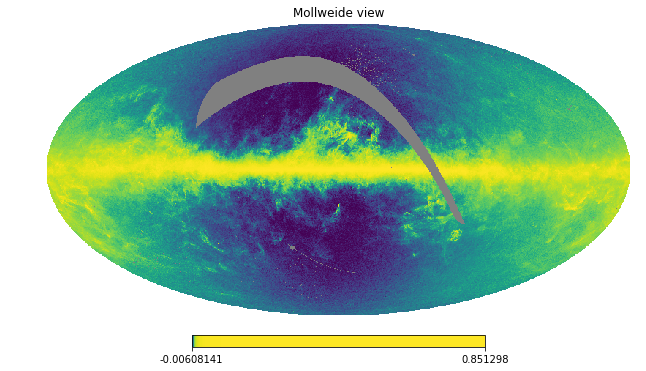

In [140]:
hp.mollview(m0,remove_dip = True, norm = 'hist')

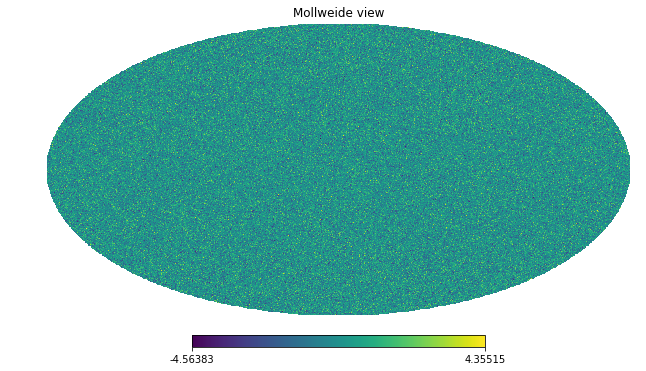

In [121]:
# Set the number of sources and the coordinates for the input
nsources = int(1.e7)
nside = 512
npix = hp.nside2npix(nside)

# Coordinates and the density field f
thetas = np.random.random(nsources) * np.pi
phis = np.random.random(nsources) * np.pi * 2.
fs = np.random.randn(nsources)

# Go from HEALPix coordinates to indices
indices = hp.ang2pix(nside, thetas, phis)

# Initate the map and fill it with the values
hpxmap = np.zeros(npix, dtype=np.float)
hpxmap[indices] += fs[indices]

# Inspect the map
hp.mollview(hpxmap)

In [124]:
print ('calculating spherical harmonics',datetime.datetime.now().time())
cl = hp.anafast(hpxmap)
print ('done calculating spherical harmonics',datetime.datetime.now().time())

calculating spherical harmonics 15:40:20.809438
done calculating spherical harmonics 15:40:28.188542


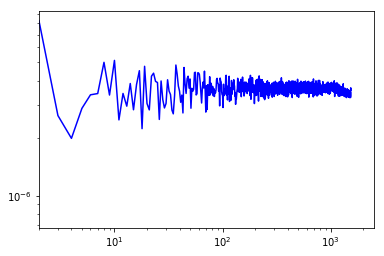

In [125]:
ls = np.arange(cl.shape[0])
plt.loglog(ls,cl, color='b')
plt.xlim([2,2500])
plt.show()